<h1>INFECTIOUS dataset</h1>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
G3 =nx.read_edgelist('edge_list.txt', create_using = nx.Graph(), nodetype=int)

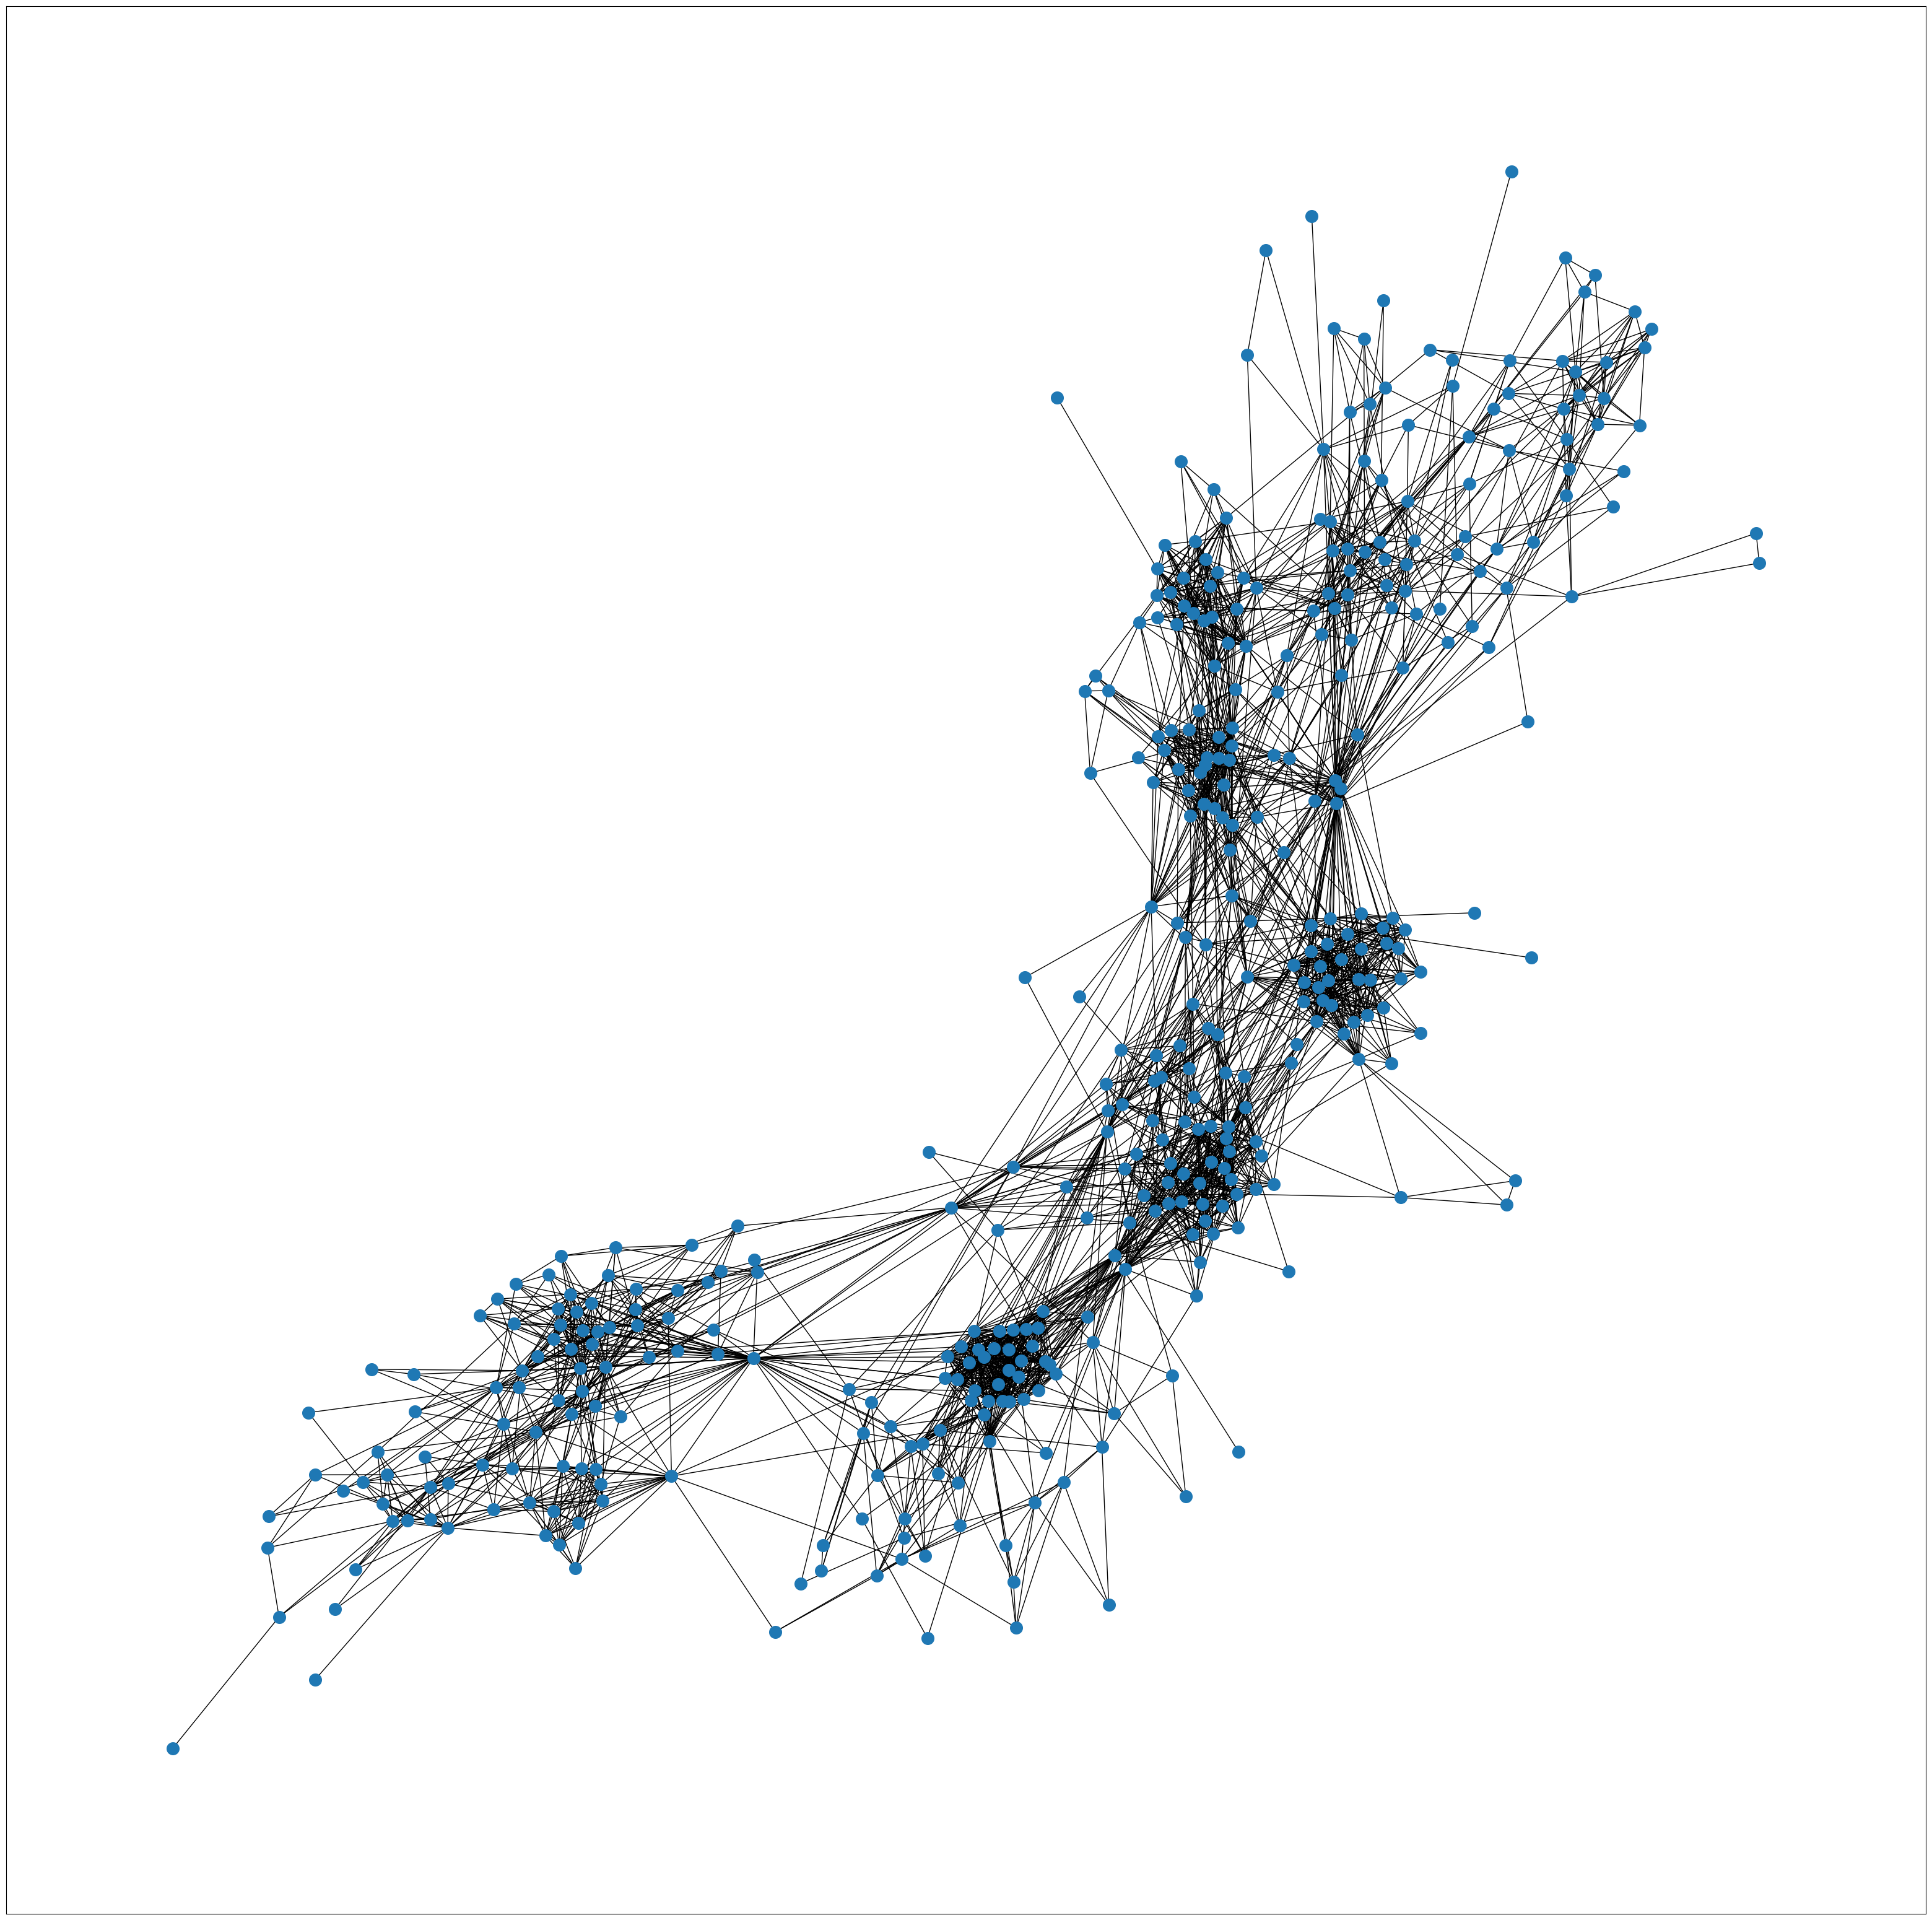

In [2]:
pos = nx.spring_layout(G3)
plt.figure(figsize=(40,40))
node_size=200
nx.draw_networkx(G3, pos=pos, with_labels=False, node_size=node_size)

<h2>Centrality measures</h2>

<h4>Betweenness centrality</h4>

In [13]:
betCent = nx.betweenness_centrality(G3, normalized=True, endpoints=True)

[188, 272, 51, 230, 50]

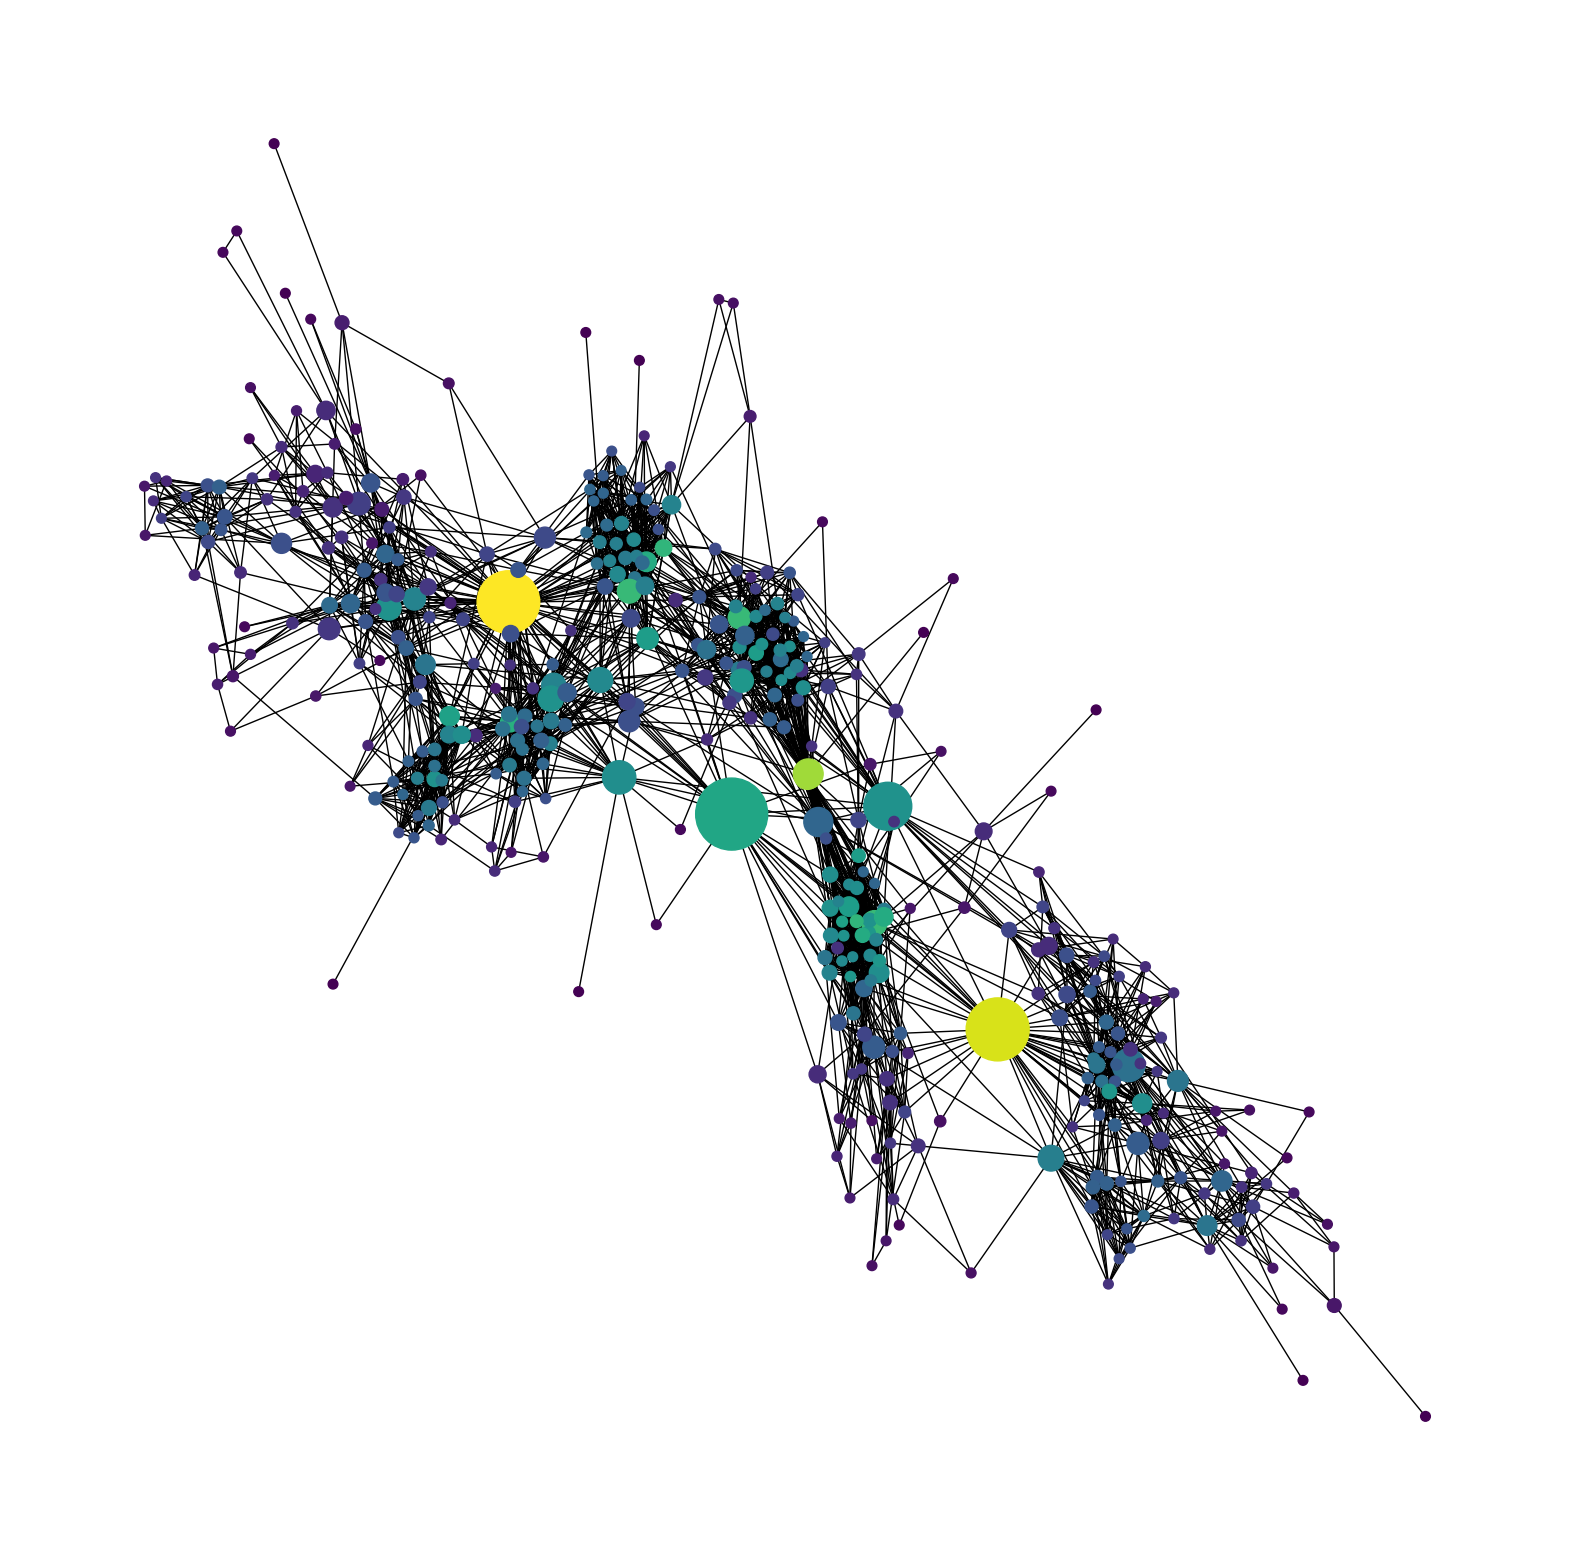

In [14]:
node_color = [20000.0 * G3.degree(v) for v in G3]
node_size = [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G3, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

<h4>Degree centrality</h4>

In [18]:
degreeCent = nx.degree_centrality(G3)

[51, 272, 235, 195, 161]

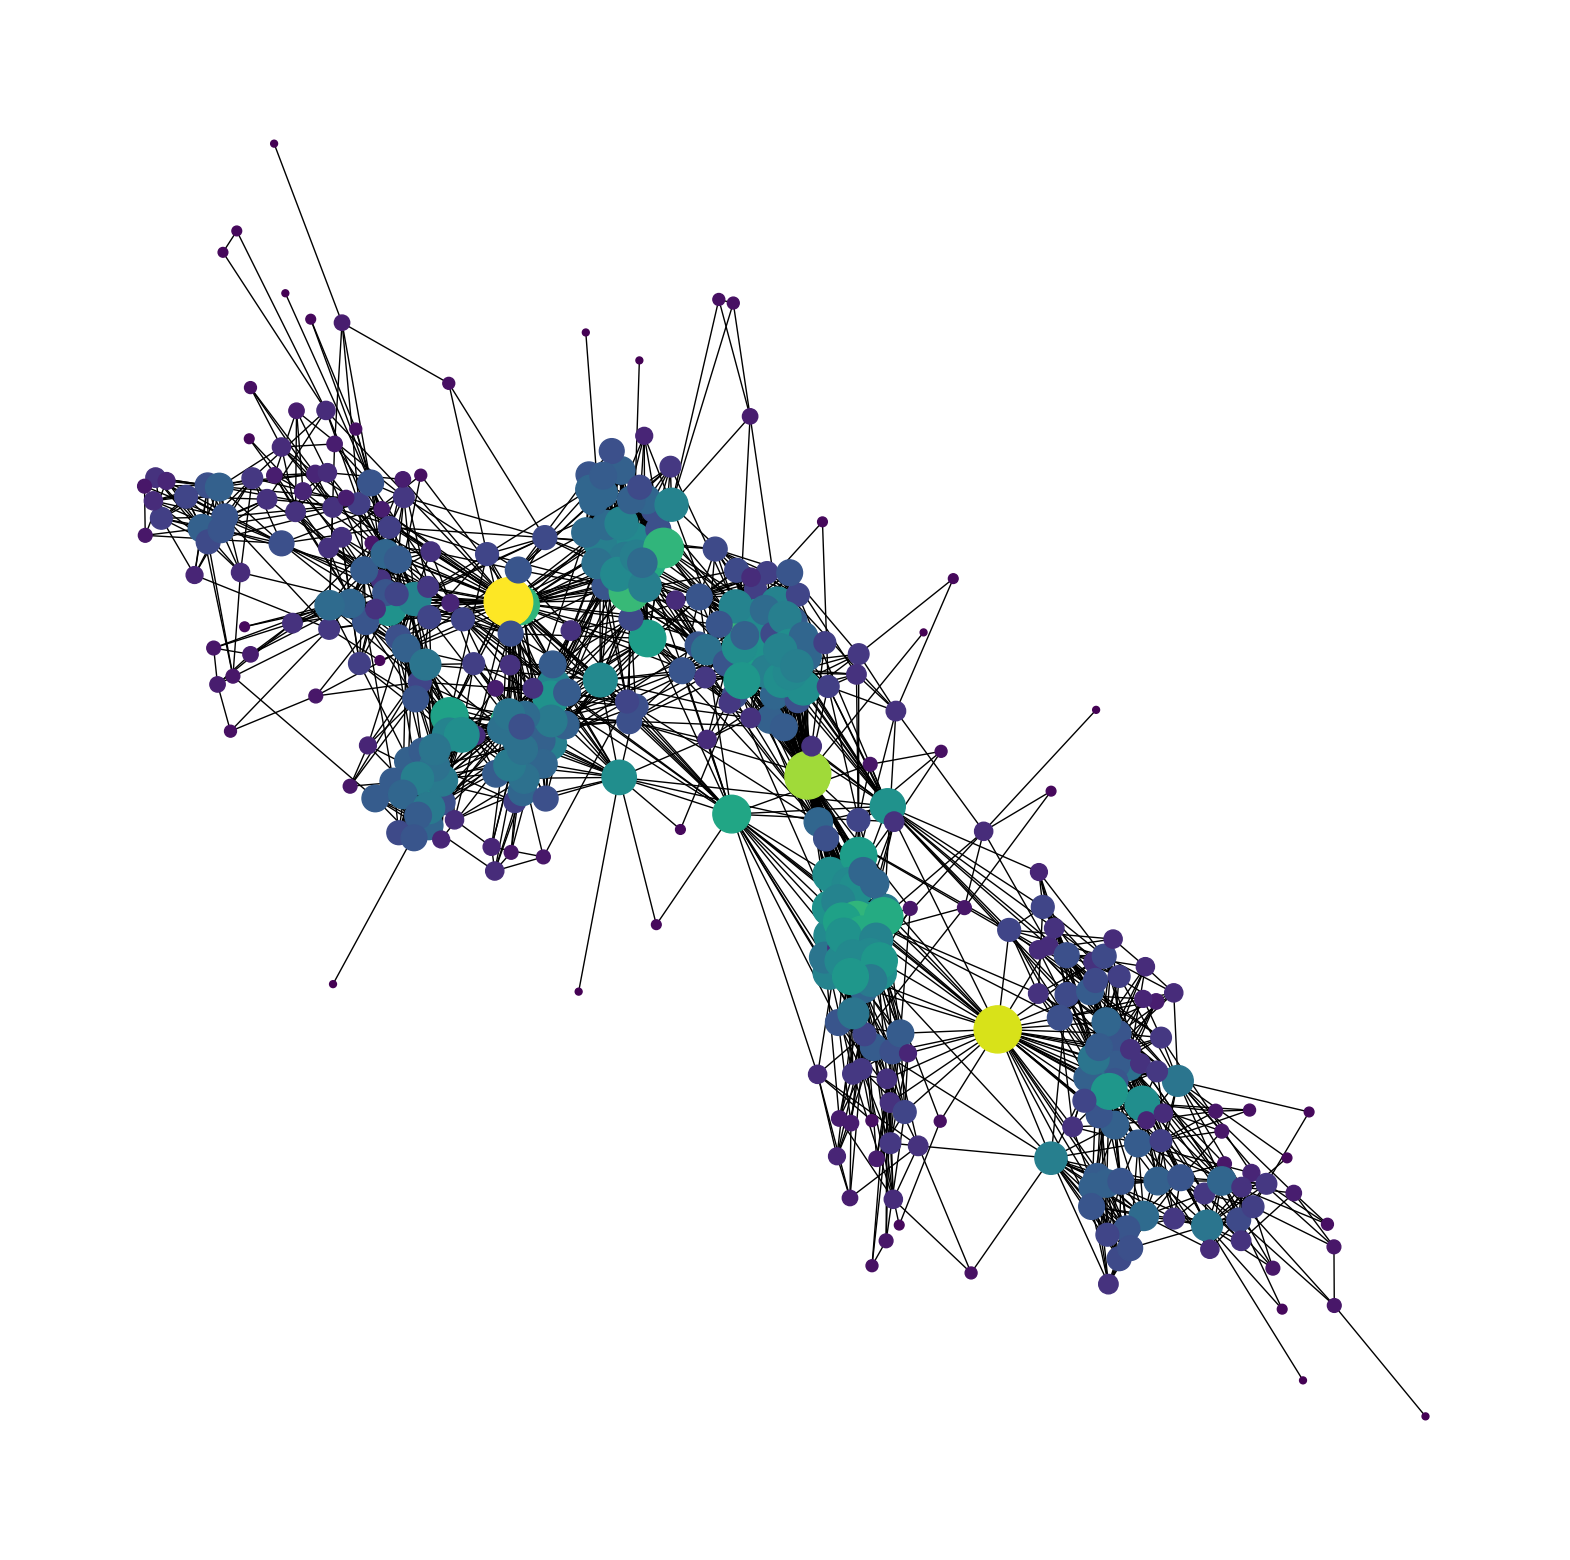

In [19]:
node_color = [20000.0 * G3.degree(v) for v in G3]
node_size = [v * 10000 for v in degreeCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G3, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(degreeCent, key=degreeCent.get, reverse=True)[:5]

<h4>Closeness centrality</h4>

In [20]:
closenessCent = nx.closeness_centrality(G3, u=None, distance=None, wf_improved=True)

[188, 51, 230, 50, 117]

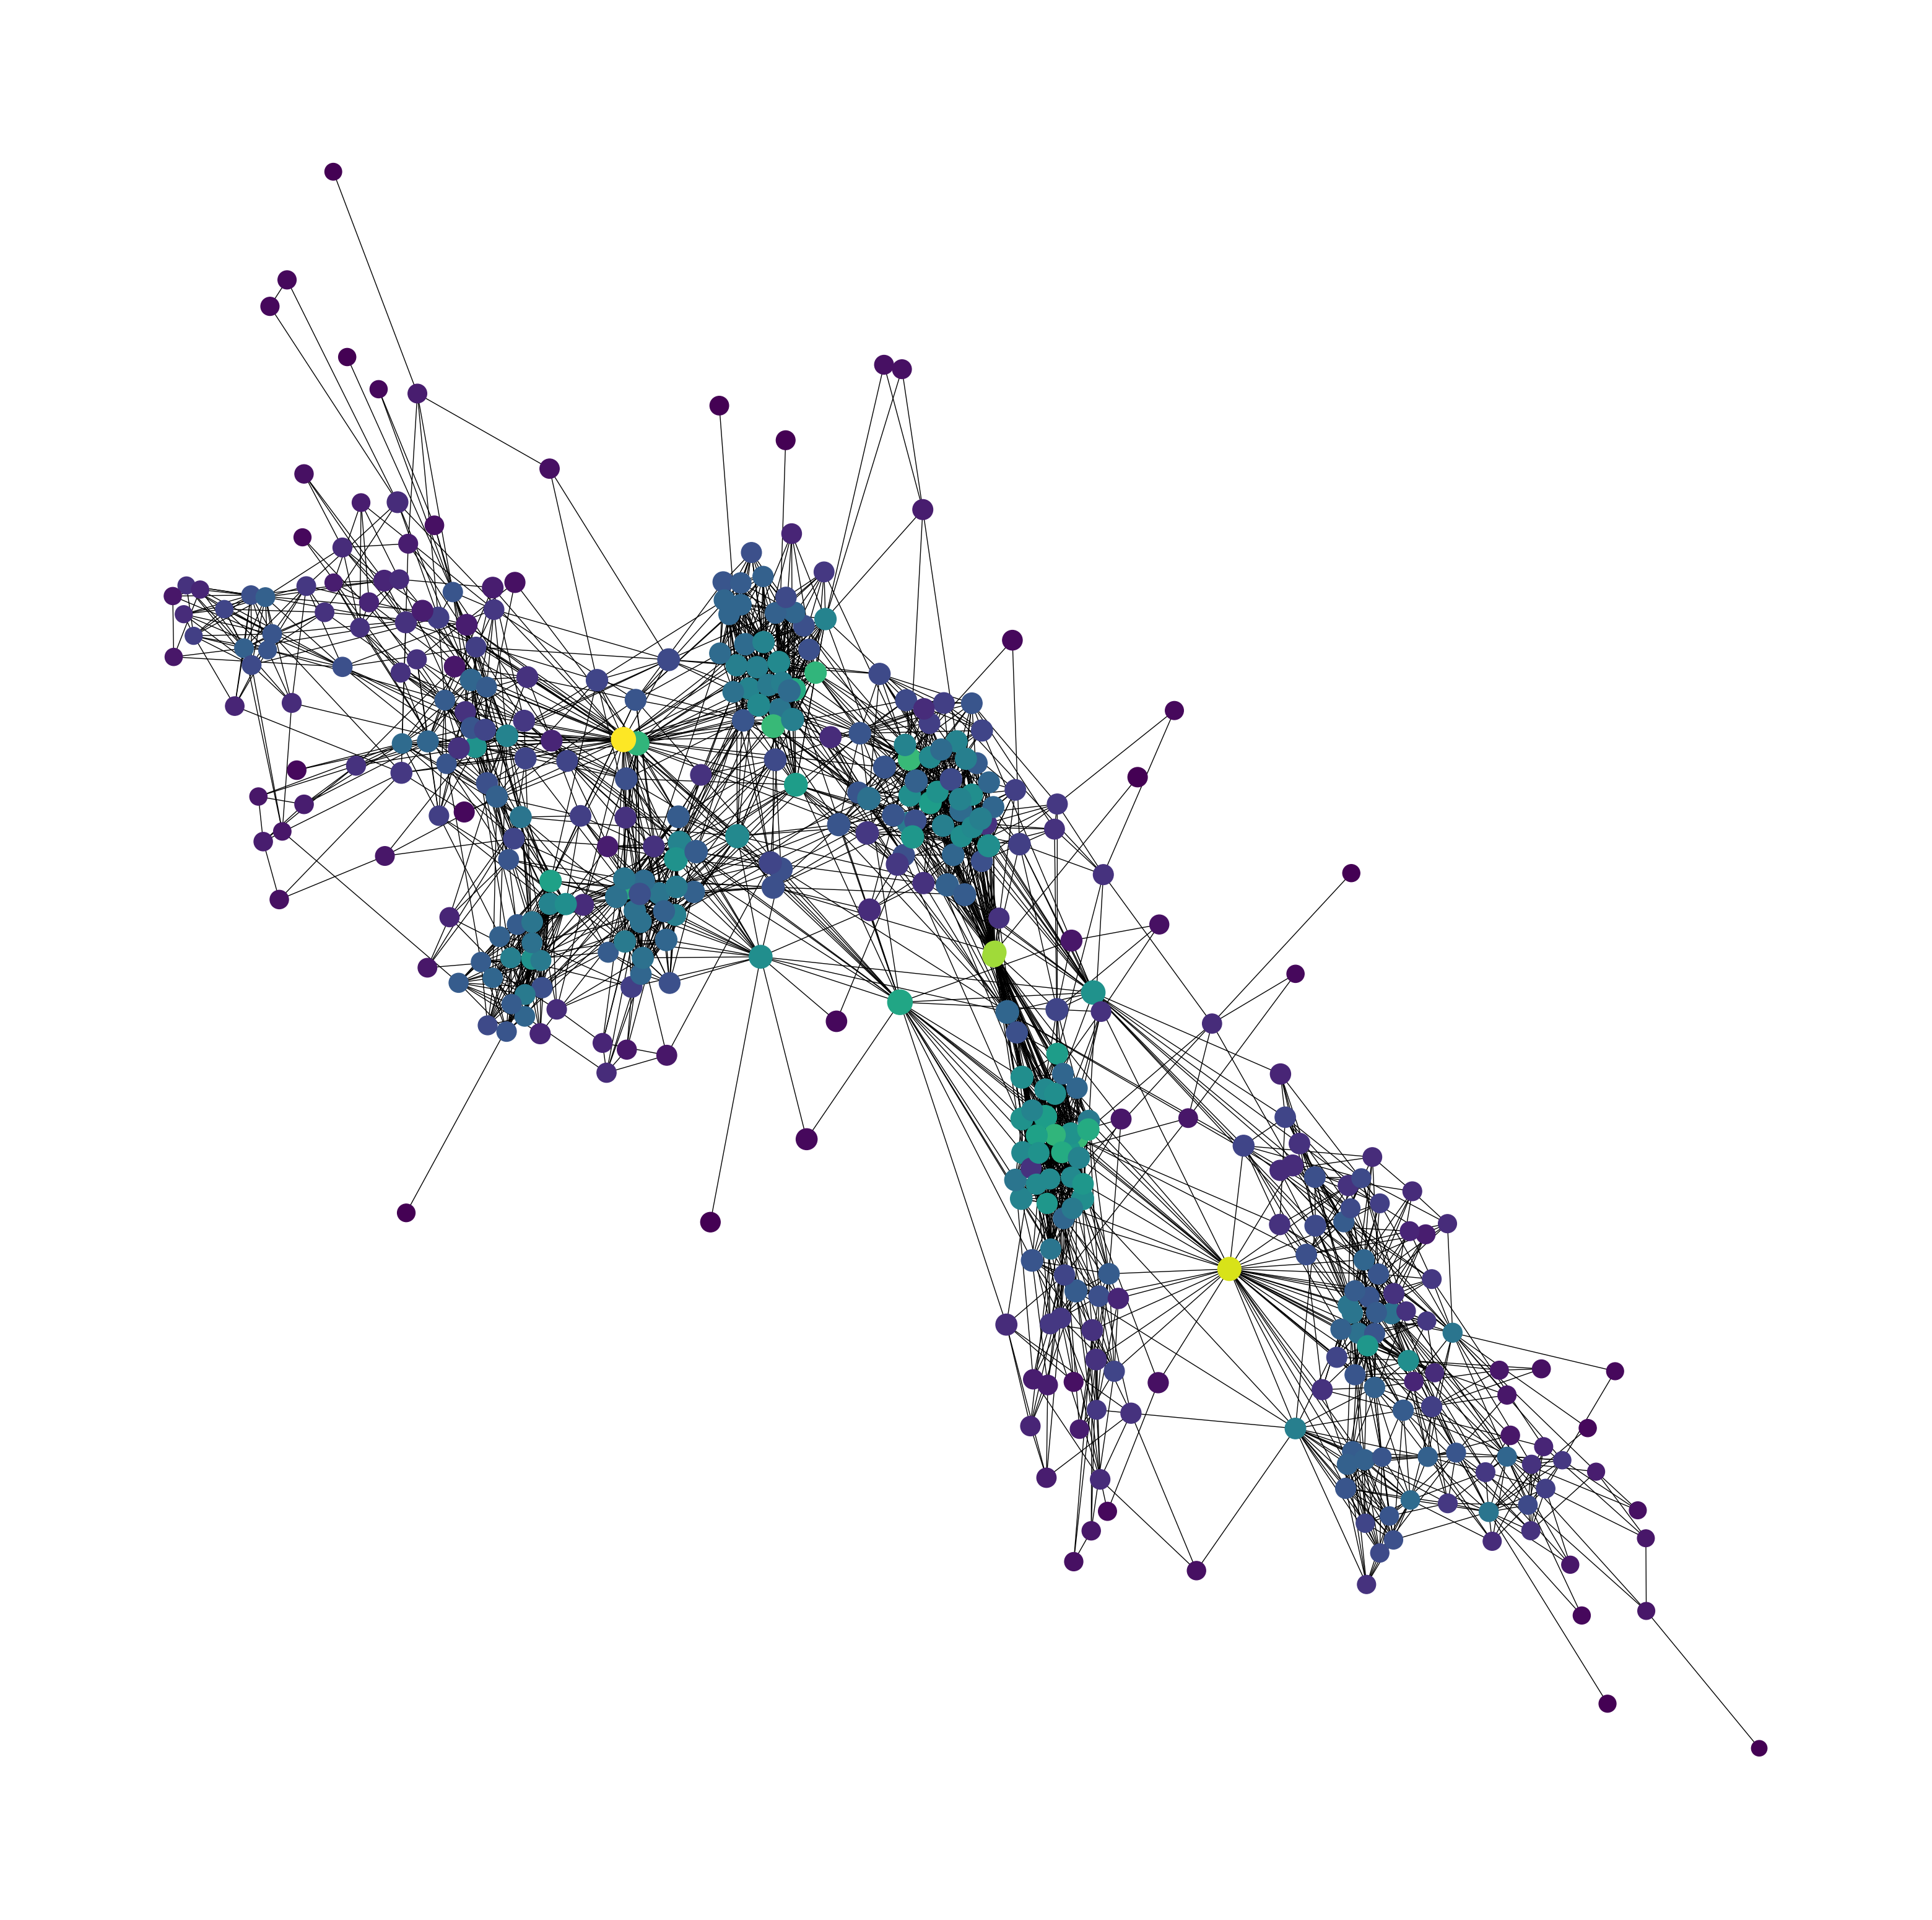

In [25]:
node_color = [20000.0 * G3.degree(v) for v in G3]
node_size = [v * 2000 for v in closenessCent.values()]
plt.figure(figsize=(40,40))
nx.draw_networkx(G3, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(closenessCent, key=closenessCent.get, reverse=True)[:5]

<h4>Eigenvector Centrality</h4>

In [33]:
EigCent= eigenvector_centrality(G3, max_iter=100, tol=1e-06, nstart=None, weight=None)

[292, 299, 288, 294, 265]

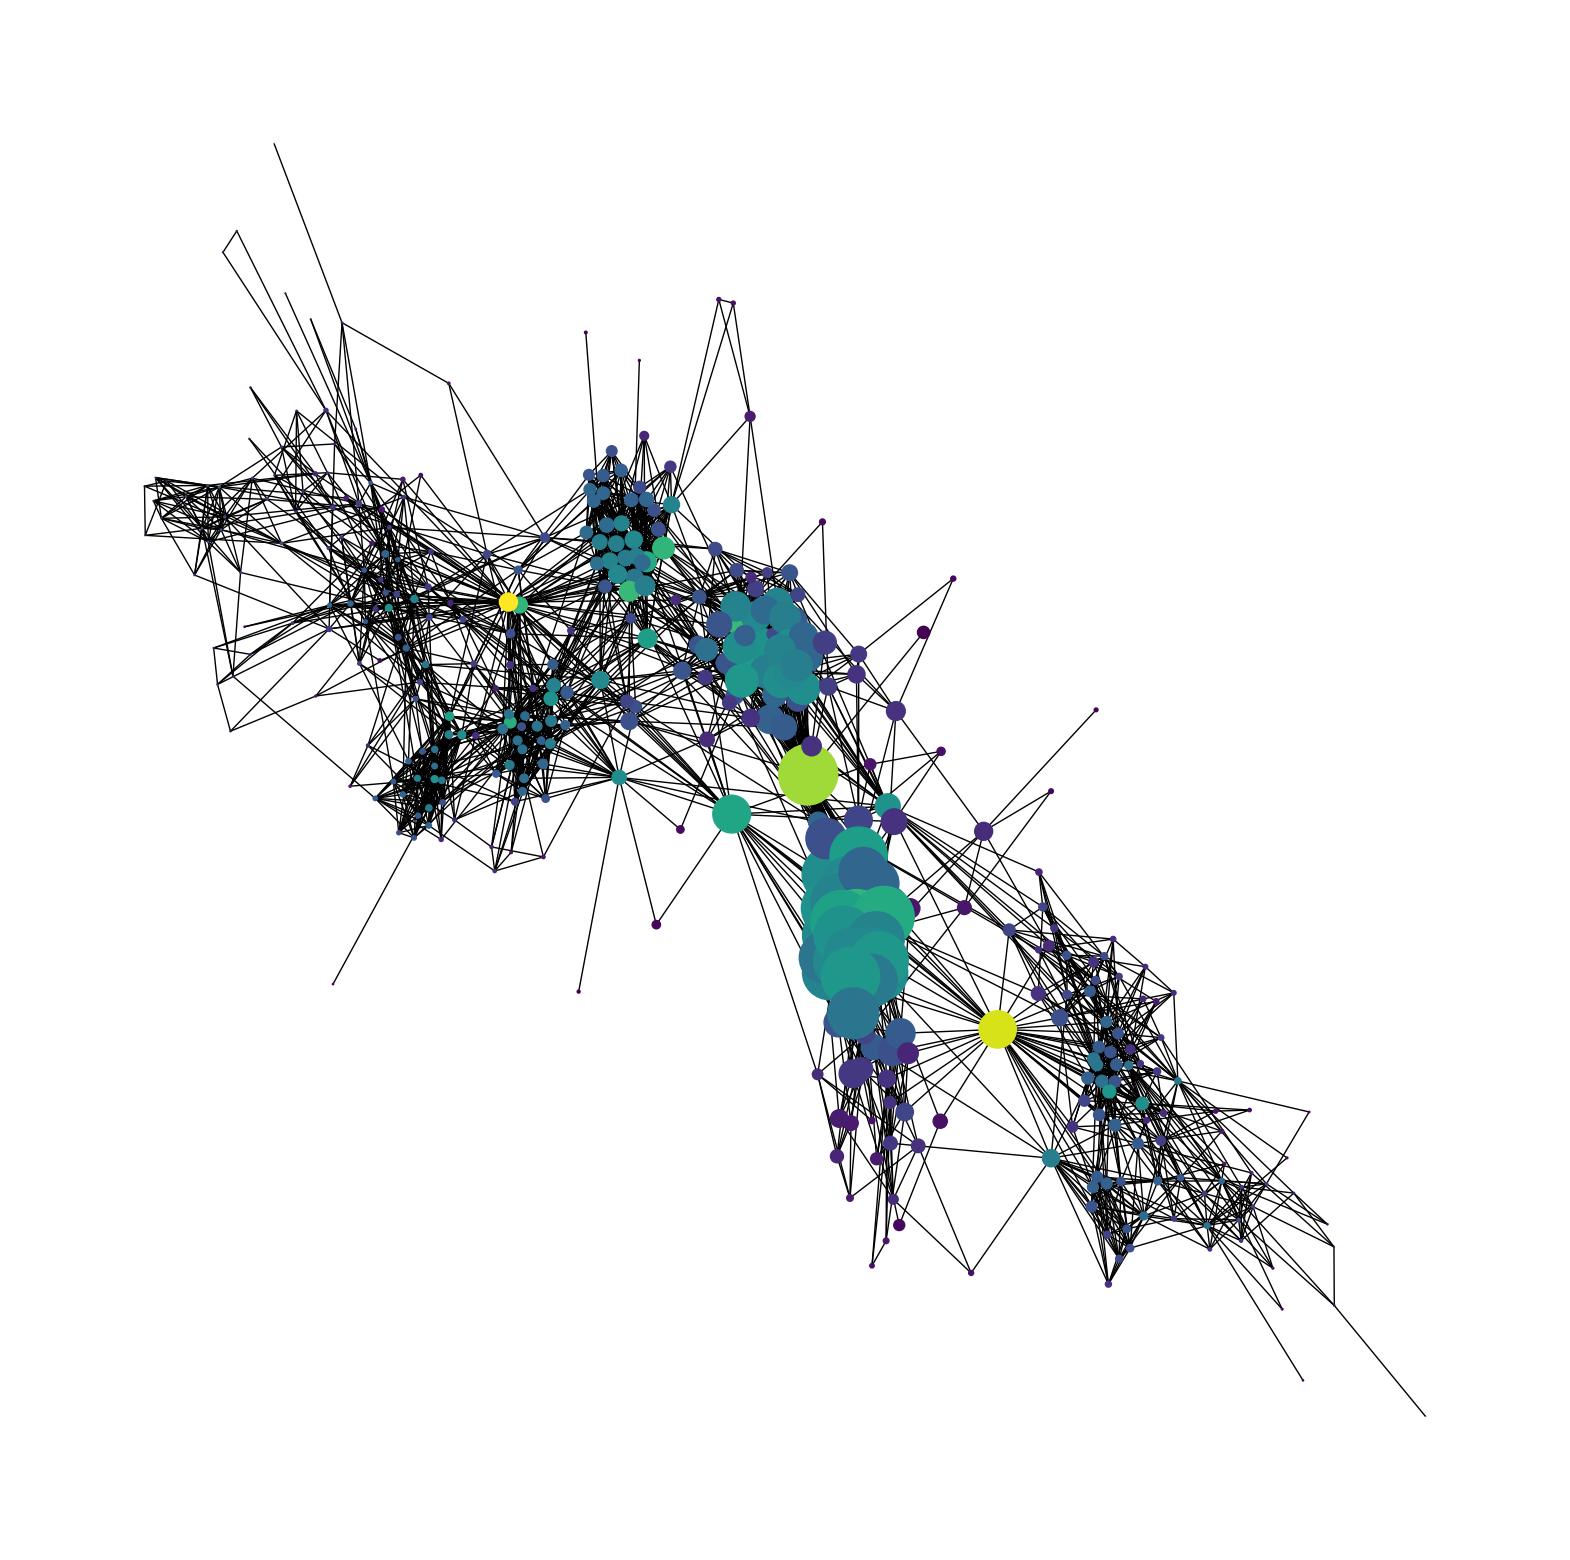

In [34]:
node_color = [20000.0 * G3.degree(v) for v in G3]
node_size = [v * 10000 for v in EigCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G3, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(EigCent, key=EigCent.get, reverse=True)[:5]

<h4>Load centrality</h4>

In [35]:
LoadCentr=load_centrality(G3, v=None, cutoff=None, normalized=True, weight=None)

[188, 272, 51, 230, 50]

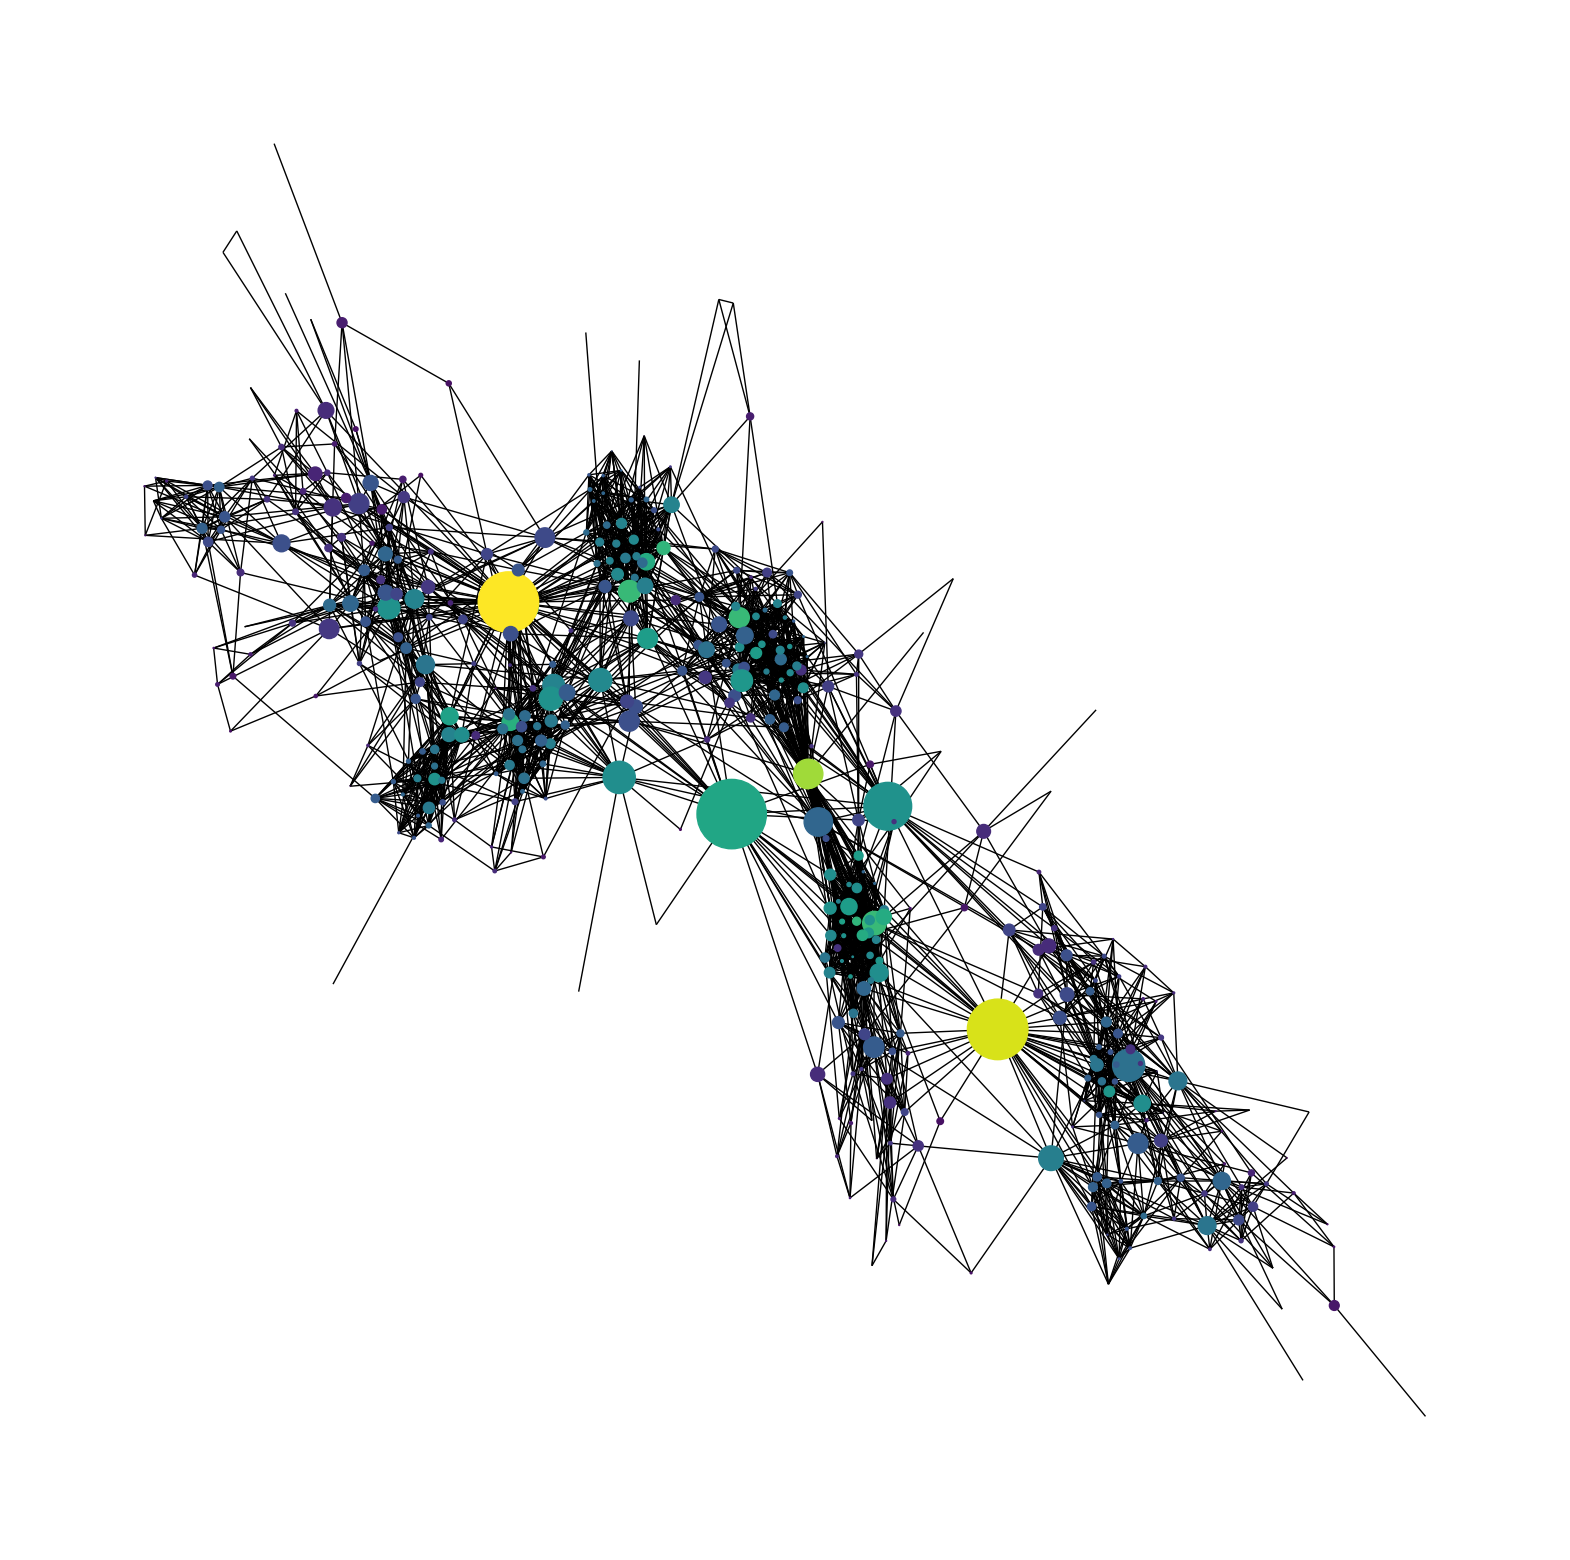

In [36]:
node_color = [20000.0 * G3.degree(v) for v in G3]
node_size = [v * 10000 for v in LoadCentr.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G3, pos=pos, with_labels=False,
node_color=node_color,
node_size=node_size)
plt.axis('off')
sorted(LoadCentr, key=LoadCentr.get, reverse=True)[:5]

<h4>K clique communities</h4>

<p>Clique percolation is a method to find overlapping communities. It is based on the concept that the internal edges of the community are likely to form cliques while intercommunity edges are unlikely to form cliques.<br>
A clique is a complete graph and a k-clique is a complete graph with k vertices.<br>
</p>

In [5]:
from networkx.algorithms.community import k_clique_communities

In [47]:
c = list(k_clique_communities(G3, 13)) 

In [48]:
len(c) #it means that in our graph there is just one 13-clique community

1

In [49]:
sorted(list(c[0]))

[281,
 282,
 283,
 284,
 285,
 287,
 288,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 314]

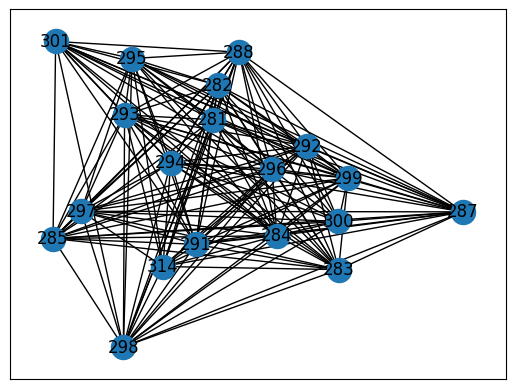

In [51]:
res= list(c[0])
k = G3.subgraph(res) 
from matplotlib import pylab as pl
pl.figure()
nx.draw_networkx(k, pos=pos)

In [4]:
import networkx.algorithms.community as nxcom
from networkx.algorithms.community import greedy_modularity_communities
communities = sorted(nxcom.greedy_modularity_communities(G3), key=len, reverse=True)

In [5]:
len(communities)

5

In [6]:
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)
import pylab

In [7]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [8]:
# Set node and edge communities
set_node_community(G3, communities)
set_edge_community(G3)
node_color = [get_color(G3.nodes[v]['community']) for v in G3.nodes]
# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in G3.edges if G3.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G3.edges if G3.edges[v, w]['community'] > 0]
internal_color = ['white' for e in internal]

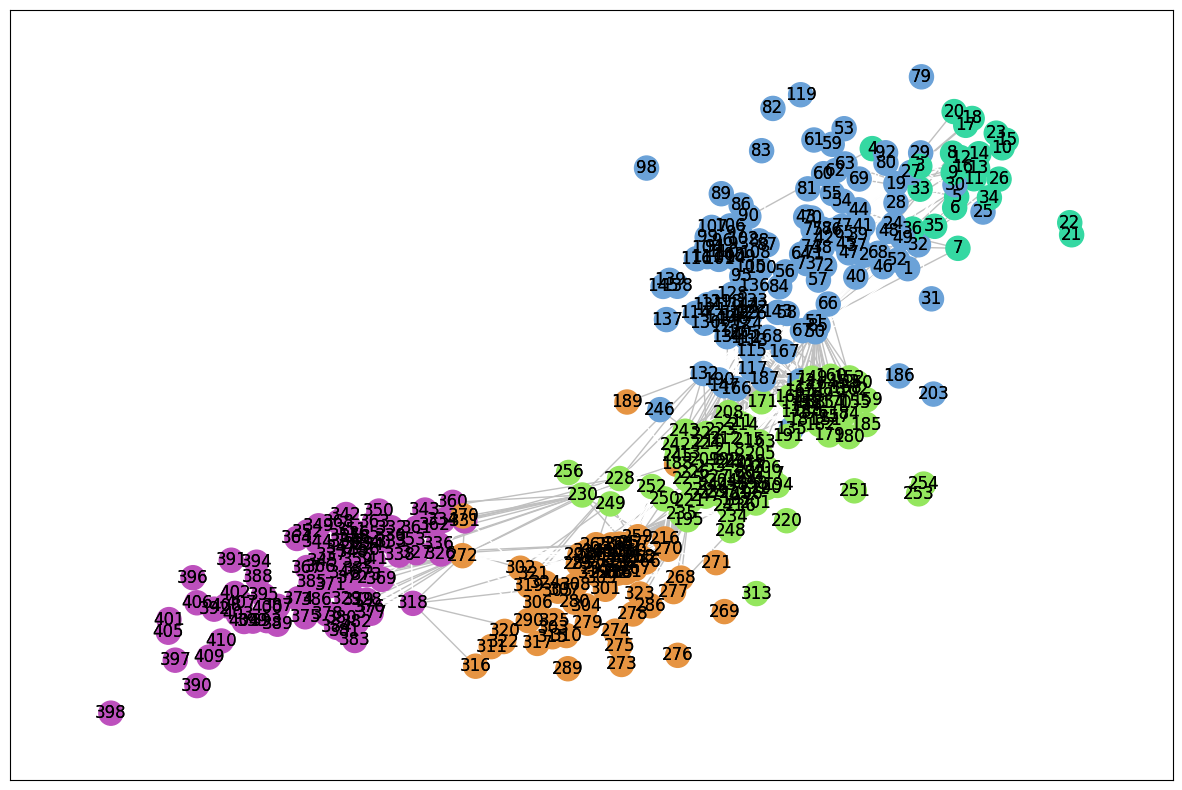

In [12]:
# Draw external edges
nx.draw_networkx(
    G3,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    G3,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)
pylab.show()